In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
import statsmodels.api as sm
from sklearn.cross_decomposition import CCA
from datetime import datetime
from statsmodels.stats.outliers_influence import variance_inflation_factor
%matplotlib inline

In [2]:
data = pd.read_csv("C:/Python/Capstone Project/ANOVA/testfinal.csv")

In [4]:
#replace null values in 'Battery status' var to 0 before convert to dummy variables
data['Battery_Status'].fillna(value=0)

0          0.0
1          0.0
2          0.0
3          0.0
4          0.0
          ... 
1088727    2.0
1088728    2.0
1088729    2.0
1088730    2.0
1088731    2.0
Name: Battery_Status, Length: 1088732, dtype: float64

In [5]:
data = pd.get_dummies(data, columns=['host','Battery_Status','Output_Status'])

In [6]:
data.describe()

,Base_Config_Num_Device,Battery_Voltage,Capacity,Config_Rated_Output_Voltage,Date_Manufacture,Full_Charge_Voltage,Input_Frequency,Input_Line_Voltage,Input_Max_Line_Voltage,Input_Min_Line_Voltage,...,Remaining_Time,Replacement,Temperature,Time_On_Battery,host_10.0.0.53,host_10.0.0.8,Battery_Status_2.0,Output_Status_2,Output_Status_3,Output_Status_6
count,1088732.0,1.088732e+06,1.088732e+06,1088732.0,0.0,1.088732e+06,12761.000000,1.088732e+06,1.088732e+06,16479.000000,...,1.088732e+06,1088732.0,1.088732e+06,1.088732e+06,1.088732e+06,1.088732e+06,1.088732e+06,1.088732e+06,1.088732e+06,1.088732e+06
mean,4.0,2.200726e+01,9.667899e+01,2300.0,NaN,8.597316e+02,460.931275,2.412694e+03,2.509750e+03,2267.597730,...,1.490202e+01,0.0,2.816456e+02,2.098949e+00,5.361375e-01,4.638625e-01,1.205806e-02,9.972555e-01,1.003920e-03,1.740557e-03
std,0.0,1.484557e-01,3.319450e+00,0.0,NaN,5.384967e+02,132.399408,8.562087e+01,6.154385e+01,570.589194,...,6.928519e+02,0.0,4.029250e+01,8.346569e+01,4.986926e-01,4.986926e-01,1.091452e-01,5.231584e-02,3.166881e-02,4.168368e-02
min,4.0,2.000000e+01,5.500000e+01,2300.0,NaN,3.600000e+02,0.000000,0.000000e+00,0.000000e+00,0.000000,...,0.000000e+00,0.0,2.200000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.0,2.200000e+01,9.300000e+01,2300.0,NaN,3.600000e+02,499.000000,2.397000e+03,2.452000e+03,2393.000000,...,0.000000e+00,0.0,2.500000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
50%,4.0,2.200000e+01,9.500000e+01,2300.0,NaN,3.600000e+02,499.000000,2.415000e+03,2.457000e+03,2408.000000,...,0.000000e+00,0.0,2.500000e+02,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
75%,4.0,2.200000e+01,1.000000e+02,2300.0,NaN,1.440000e+03,499.000000,2.433000e+03,2.576000e+03,2426.000000,...,0.000000e+00,0.0,3.200000e+02,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
max,4.0,2.400000e+01,1.000000e+02,2300.0,NaN,1.440000e+03,500.000000,2.573000e+03,2.576000e+03,2464.000000,...,1.200000e+05,0.0,4.000000e+02,5.135000e+03,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


## Data Cleaning

In [7]:
#drop unnecessary columns
data_new=data.drop(['name','Last_Replacement_Date','Date_Manufacture','Replacement'], axis=1)

In [9]:
# Convert the time column to datetime
data_new['time'] = pd.to_datetime(data_new['time'], format='%Y-%m-%dT%H:%M:%S.%fZ')

# Format the time column as a string
data_new['time'] = data_new['time'].dt.strftime('%Y-%m-%d %H:%M:%S')

In [10]:
#to check missing values
#.dropna()
data_new.isna().sum().where(lambda x: x>0)

time                                 NaN
Base_Config_Num_Device               NaN
Battery_Voltage                      NaN
Capacity                             NaN
Config_Rated_Output_Voltage          NaN
Full_Charge_Voltage                  NaN
Input_Frequency                1075971.0
Input_Line_Voltage                   NaN
Input_Max_Line_Voltage               NaN
Input_Min_Line_Voltage         1072253.0
Output_Frequency                     NaN
Output_Line_Voltage                  NaN
Output_Load                    1075982.0
Remaining_Time                       NaN
Temperature                          NaN
Time_On_Battery                      NaN
host_10.0.0.53                       NaN
host_10.0.0.8                        NaN
Battery_Status_2.0                   NaN
Output_Status_2                      NaN
Output_Status_3                      NaN
Output_Status_6                      NaN
dtype: float64

### Data tweak

In [11]:
# Data imputation to create outliers, temperature spike 
# and low battery capacity
data_new.loc[data_new['Temperature'] == 22, 'Temperature'] = 60
data_new.loc[data_new['Capacity'] == 55, 'Capacity'] = 10

In [13]:
# battery_status data tweaked
data_new['Battery_Status_2.0'] = data_new['Battery_Status_2.0'].replace({0:1, 1:0})
# battery_status and capacity tweak data 
data_new.loc[data_new['Battery_Status_2.0'] == 0, 'Capacity'] =10

In [16]:
# change the value of the battery from 0 to 1 and 1 to 0 
# means 1= normal change to 0=low battery and vice versa
data_new['Battery_Status_2.0'].value_counts()as

1    1075604
0      13128
Name: Battery_Status_2.0, dtype: int64

In [17]:
# impute the missing values with mean
data_new['Battery_Voltage'] = data_new['Battery_Voltage'].fillna(data_new['Battery_Voltage'].mean())
data_new['Input_Frequency'] = data_new['Input_Frequency'].fillna(data_new['Input_Frequency'].mean())
data_new['Output_Load'] = data_new['Output_Load'].fillna(data_new['Output_Load'].mean())
data_new['Input_Min_Line_Voltage'] = data_new['Input_Min_Line_Voltage'].fillna(data_new['Input_Min_Line_Voltage'].mean())

In [18]:
# to standardize the data
data_new['Temperature'] = (data_new['Temperature'] * 0.10).round(2)
data_new['Input_Line_Voltage'] = (data_new['Input_Line_Voltage'] * 0.10).round(2)
data_new['Full_Charge_Voltage'] = (data_new['Full_Charge_Voltage'] * 0.10).round(2)
data_new['Config_Rated_Output_Voltage'] = (data_new['Config_Rated_Output_Voltage'] * 0.10).round(2)
data_new['Input_Max_Line_Voltage'] = (data_new['Input_Max_Line_Voltage'] * 0.10).round(2)
data_new['Input_Min_Line_Voltage'] = (data_new['Input_Min_Line_Voltage'] * 0.10).round(2)

# Outlier - Box Plot

C:\Users\Dila\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Dila\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Dila\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Dila\anaconda3\lib\site-p

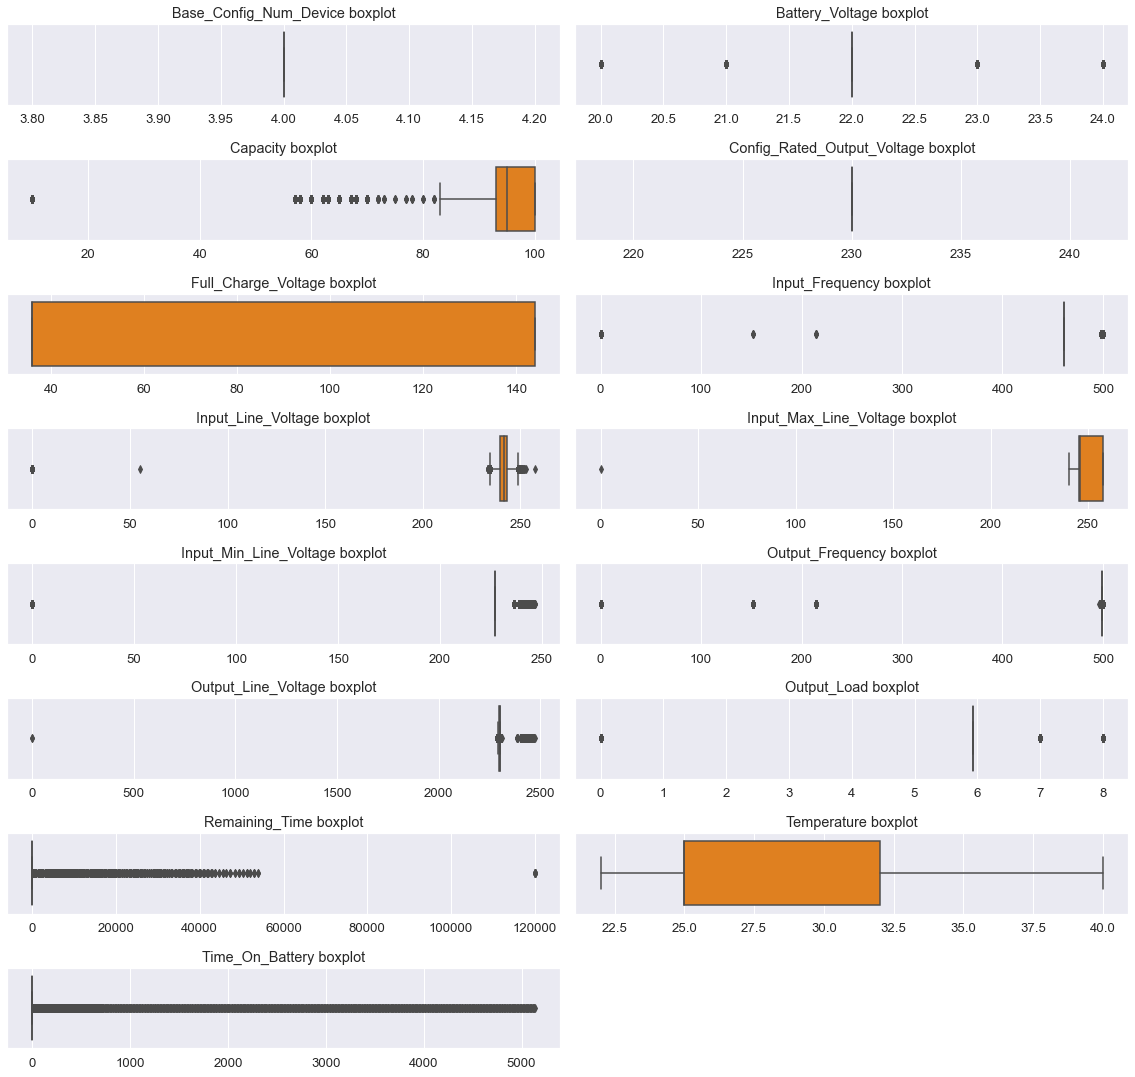

In [33]:
#Columns from `data_new.describe()` I want to examine

features = ['Base_Config_Num_Device', 'Battery_Voltage', 'Capacity', 'Config_Rated_Output_Voltage', 'Full_Charge_Voltage', 'Input_Frequency', 'Input_Line_Voltage', 'Input_Max_Line_Voltage', 'Input_Min_Line_Voltage', 'Output_Frequency','Output_Line_Voltage','Output_Load','Remaining_Time','Temperature','Time_On_Battery']


#Creating a boxplot and a histogram for outlier detection

n = 1

sns.set_style('darkgrid')
sns.set(font_scale = 1.2)
plt.figure(figsize = (16, 28))

for feature in features:
    plt.subplot(15,2,n)
    sns.boxplot(data_new[feature], palette = 'autumn').set(xlabel = None)
    plt.title(f'{feature} boxplot')
    n = n + 1
    
    plt.tight_layout()

# Multiple Linear Regression

In [46]:
# drop one level of the categorical variable that equal to 0

if 'host_10.0.0.53' in data_new.columns:
    data_new_MLR = data_new[data_new['host_10.0.0.53'] != 0]
if 'host_10.0.0.8' in data_new.columns:
    data_new_MLR = data_new[data_new['host_10.0.0.8'] != 0]
if 'Battery_Status_2.0' in data_new.columns:
    data_new_MLR = data_new[data_new['Battery_Status_2.0'] != 0]
if 'Output_Status_2' in data_new.columns:
    data_new_MLR = data_new[data_new['Output_Status_2'] != 0]
if 'Output_Status_3' in data_new.columns:
    data_new_MLR = data_new[data_new['Output_Status_3'] != 0]
if 'Output_Status_6' in data_new.columns:
    data_new_MLR = data_new[data_new['Output_Status_6'] != 0]

In [47]:
data_new_MLR.describe()

,Base_Config_Num_Device,Battery_Voltage,Capacity,Config_Rated_Output_Voltage,Full_Charge_Voltage,Input_Frequency,Input_Line_Voltage,Input_Max_Line_Voltage,Input_Min_Line_Voltage,Output_Frequency,...,Output_Load,Remaining_Time,Temperature,Time_On_Battery,host_10.0.0.53,host_10.0.0.8,Battery_Status_2.0,Output_Status_2,Output_Status_3,Output_Status_6
count,1895.0,1895.0,1895.000000,1895.0,1895.000000,1.895000e+03,1895.000000,1895.000000,1.895000e+03,1895.000000,...,1.895000e+03,1895.0,1895.000000,1895.0,1895.000000,1895.000000,1895.0,1895.0,1895.0,1895.0
mean,4.0,22.0,99.672823,230.0,136.932982,4.609313e+02,243.920950,256.539683,2.267600e+02,499.483377,...,5.923451e+00,0.0,24.340897,0.0,0.065435,0.934565,1.0,0.0,0.0,1.0
std,0.0,0.0,1.236789,0.0,26.714637,5.401550e-12,1.376956,4.016995,5.771130e-12,0.507196,...,1.616911e-13,0.0,0.639174,0.0,0.247358,0.247358,0.0,0.0,0.0,0.0
min,4.0,22.0,95.000000,230.0,36.000000,4.609313e+02,238.700000,240.400000,2.267600e+02,498.000000,...,5.923451e+00,0.0,23.000000,0.0,0.000000,0.000000,1.0,0.0,0.0,1.0
25%,4.0,22.0,100.000000,230.0,144.000000,4.609313e+02,243.000000,257.600000,2.267600e+02,499.000000,...,5.923451e+00,0.0,24.000000,0.0,0.000000,1.000000,1.0,0.0,0.0,1.0
50%,4.0,22.0,100.000000,230.0,144.000000,4.609313e+02,244.300000,257.600000,2.267600e+02,499.000000,...,5.923451e+00,0.0,24.000000,0.0,0.000000,1.000000,1.0,0.0,0.0,1.0
75%,4.0,22.0,100.000000,230.0,144.000000,4.609313e+02,245.000000,257.600000,2.267600e+02,500.000000,...,5.923451e+00,0.0,25.000000,0.0,0.000000,1.000000,1.0,0.0,0.0,1.0
max,4.0,22.0,100.000000,230.0,144.000000,4.609313e+02,247.300000,257.600000,2.267600e+02,500.000000,...,5.923451e+00,0.0,27.000000,0.0,1.000000,1.000000,1.0,0.0,0.0,1.0


## DV : Temperature
### * DV : Dependent Variable

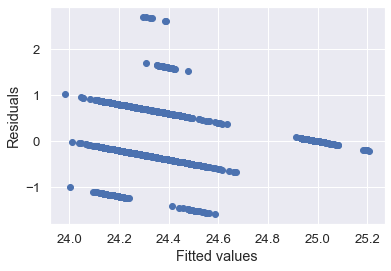

In [52]:
#drop variables 'Config_Rated_Output_Voltage', 'Base_Config_Num_Device'

# Specify the predictor variables (including the dummy variables)
predictors= data_new_MLR[['host_10.0.0.53', 'host_10.0.0.8', 'Battery_Status_2.0', 
                       'Output_Status_2','Output_Status_3','Output_Status_6',
                       'Battery_Voltage', 'Capacity', 'Full_Charge_Voltage', 
                       'Input_Frequency','Input_Line_Voltage','Output_Frequency', 'Output_Line_Voltage',
                       'Output_Load']]

# Specify the dependent variable
dependent_var = data_new_MLR['Temperature']


# Create the linear regression model
model = LinearRegression().fit(predictors, dependent_var)

# Calculate the model's residuals
residuals = dependent_var - model.predict(predictors)

# Scatter plot of residuals vs predictors
#sns.pairplot(pd.DataFrame(predictors_dropTemperature, columns=predictors_dropTemperature.columns), diag_kind="kde")
#plt.show()

# Scatter plot of residuals vs fitted values
plt.scatter(model.predict(predictors), residuals)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()


the residuals randomly scattered around zero, with no clear pattern thus the relationship is linear.

## Create numerical predictors only

In [57]:
predictors_numerical= predictors[['Battery_Voltage', 'Capacity','Full_Charge_Voltage','Input_Frequency','Input_Line_Voltage',
                        'Output_Frequency', 'Output_Line_Voltage',
                       'Output_Load']]

## To check assumptions

In [58]:
dw_stat = sm.stats.stattools.durbin_watson(residuals)
print("Durbin-Watson statistic: ", dw_stat)

Durbin-Watson statistic:  0.37278423665697413


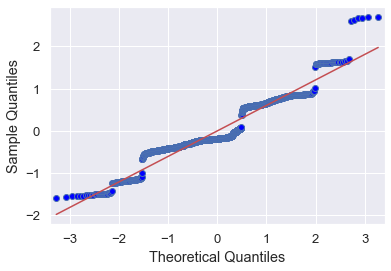

In [59]:
sm.qqplot(residuals, line='s')
plt.show()

In [60]:
predictors_numerical.columns

Index(['Battery_Voltage', 'Capacity', 'Full_Charge_Voltage', 'Input_Frequency',
       'Input_Line_Voltage', 'Output_Frequency', 'Output_Line_Voltage',
       'Output_Load'],
      dtype='object')

In [61]:
# No multicollinearity assumption
vif = [variance_inflation_factor(predictors_numerical.values, i) for i in range(predictors_numerical.shape[1])]
print("Variance Inflation Factors: ", vif)

Variance Inflation Factors:  [0.0, inf, inf, 7.050621658063723e-09, 357.9541151425894, 2.0857433799692466, 0.46076940093609636, 8.382504171679231e-10]


C:\Users\Dila\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\Dila\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


## Model Summary - DV : Temperature

In [62]:
# to perform multiple linear regression for variable 'Temperature'

# Add a constant term to the predictor variables (required for statsmodels)
predictors = sm.add_constant(predictors)

# Specify the dependent variable
dependent_var = data_new_MLR['Temperature']

# Create the linear regression model
model = sm.OLS(dependent_var, predictors).fit()

# Print the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            Temperature   R-squared:                       0.109
Model:                            OLS   Adj. R-squared:                  0.107
Method:                 Least Squares   F-statistic:                     57.58
Date:                Thu, 02 Feb 2023   Prob (F-statistic):           6.70e-46
Time:                        22:38:17   Log-Likelihood:                -1731.3
No. Observations:                1895   AIC:                             3473.
Df Residuals:                    1890   BIC:                             3500.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
host_10.0.0.53          0.0005    

In [63]:
# to perform multiple linear regression for variable 'Capacity'
# Add a constant term to the predictor variables (required for statsmodels)
# Specify the predictor variables (including the dummy variables)
predictors_dropCapacity = data_new_MLR[['host_10.0.0.53', 'host_10.0.0.8', 'Battery_Status_2.0', 
                       'Output_Status_2','Output_Status_3','Output_Status_6',
                       'Battery_Voltage', 'Temperature', 'Full_Charge_Voltage', 
                       'Input_Frequency','Input_Line_Voltage','Output_Frequency', 'Output_Line_Voltage',
                       'Output_Load']]
predictors_dropCapacity = sm.add_constant(predictors_dropCapacity)

# Specify the dependent variable
dependent_var = data_new_MLR['Capacity']

# Create the linear regression model
model = sm.OLS(dependent_var, predictors_dropCapacity).fit()

# Print the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               Capacity   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.342e+22
Date:                Thu, 02 Feb 2023   Prob (F-statistic):               0.00
Time:                        22:38:17   Log-Likelihood:                 39562.
No. Observations:                1895   AIC:                        -7.911e+04
Df Residuals:                    1889   BIC:                        -7.908e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
host_10.0.0.53          0.0002   3

In [64]:
# to perform multiple linear regression for variable 'Input_Frequency'
# Add a constant term to the predictor variables (required for statsmodels)
# Specify the predictor variables (including the dummy variables)
predictors_dropInputFrequency = data_new_MLR[['host_10.0.0.53', 'host_10.0.0.8', 'Battery_Status_2.0', 
                       'Output_Status_2','Output_Status_3','Output_Status_6',
                       'Battery_Voltage', 'Temperature', 'Full_Charge_Voltage', 
                       'Capacity','Input_Line_Voltage','Output_Frequency', 'Output_Line_Voltage',
                       'Output_Load']]
predictors_dropInputFrequency = sm.add_constant(predictors_dropInputFrequency)

# Specify the dependent variable
dependent_var = data_new_MLR['Input_Frequency']

# Create the linear regression model
model = sm.OLS(dependent_var, predictors_dropInputFrequency).fit()

# Print the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        Input_Frequency   R-squared:                -2947183.994
Model:                            OLS   Adj. R-squared:           -2954984.907
Method:                 Least Squares   F-statistic:                    -377.8
Date:                Thu, 02 Feb 2023   Prob (F-statistic):               1.00
Time:                        22:38:17   Log-Likelihood:                 38910.
No. Observations:                1895   AIC:                        -7.781e+04
Df Residuals:                    1889   BIC:                        -7.777e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
host_10.0.0.53          0.0687   1

In [65]:
# to perform multiple linear regression for variable 'Battery_Voltage'
# Add a constant term to the predictor variables (required for statsmodels)
# Specify the predictor variables (including the dummy variables)
predictors_dropBattery_Voltage = data_new_MLR[['host_10.0.0.53', 'host_10.0.0.8', 'Battery_Status_2.0', 
                       'Output_Status_2','Output_Status_3','Output_Status_6',
                       'Input_Frequency', 'Temperature', 'Full_Charge_Voltage', 
                       'Capacity','Input_Line_Voltage','Output_Frequency', 'Output_Line_Voltage',
                       'Output_Load']]
predictors_dropBattery_Voltage = sm.add_constant(predictors_dropBattery_Voltage)

# Specify the dependent variable
dependent_var = data_new_MLR['Battery_Voltage']

# Create the linear regression model
model = sm.OLS(dependent_var, predictors_dropBattery_Voltage).fit()

# Print the summary of the model
print(model.summary())

C:\Users\Dila\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


                            OLS Regression Results                            
Dep. Variable:        Battery_Voltage   R-squared:                        -inf
Model:                            OLS   Adj. R-squared:                   -inf
Method:                 Least Squares   F-statistic:                    -377.8
Date:                Thu, 02 Feb 2023   Prob (F-statistic):               1.00
Time:                        22:38:17   Log-Likelihood:                 45451.
No. Observations:                1895   AIC:                        -9.089e+04
Df Residuals:                    1889   BIC:                        -9.086e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
host_10.0.0.53          0.0001   1

In [66]:
# to perform multiple linear regression for variable 'Output_Frequency'
# Add a constant term to the predictor variables (required for statsmodels)
# Specify the predictor variables (including the dummy variables)
predictors_dropOutput_Frequency = data_new_MLR[['host_10.0.0.53', 'host_10.0.0.8', 'Battery_Status_2.0', 
                       'Output_Status_2','Output_Status_3','Output_Status_6',
                       'Input_Frequency', 'Temperature', 'Full_Charge_Voltage', 
                       'Capacity','Input_Line_Voltage','Battery_Voltage', 'Output_Line_Voltage',
                       'Output_Load']]
predictors_dropOutput_Frequency = sm.add_constant(predictors_dropOutput_Frequency)

# Specify the dependent variable
dependent_var = data_new_MLR['Output_Frequency']

# Create the linear regression model
model = sm.OLS(dependent_var, predictors_dropOutput_Frequency).fit()

# Print the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       Output_Frequency   R-squared:                       0.521
Model:                            OLS   Adj. R-squared:                  0.520
Method:                 Least Squares   F-statistic:                     513.6
Date:                Thu, 02 Feb 2023   Prob (F-statistic):          5.81e-300
Time:                        22:38:17   Log-Likelihood:                -704.89
No. Observations:                1895   AIC:                             1420.
Df Residuals:                    1890   BIC:                             1448.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
host_10.0.0.53          0.0027   1

# Separate two groups of datasets from 'Test' dataset , UPS 1 and UPS 2

In [74]:
# select rows where host_10.0.0.53 = 1
UPS1= data_new.loc[data_new['host_10.0.0.53'] == 1]
print(UPS1)

                        time  Base_Config_Num_Device  Battery_Voltage  \
0        2022-12-16 08:25:41                       4               22   
2        2022-12-16 08:25:46                       4               22   
4        2022-12-16 08:25:51                       4               22   
6        2022-12-16 08:25:56                       4               22   
8        2022-12-16 08:26:01                       4               22   
...                      ...                     ...              ...   
1086929  2023-01-21 03:09:33                       4               22   
1086954  2023-01-21 03:12:03                       4               22   
1086988  2023-01-21 03:15:33                       4               22   
1087028  2023-01-21 03:19:33                       4               22   
1087033  2023-01-21 03:20:03                       4               22   

         Capacity  Config_Rated_Output_Voltage  Full_Charge_Voltage  \
0              95                        230.0      

In [75]:
#sliced rows of UPS1 dataframe to 505022
UPS1_new= UPS1.head(505022)

In [76]:
# select rows where host_10.0.0.8 = 1
UPS2= data_new.loc[data_new['host_10.0.0.8'] == 1]
print(UPS2)

                        time  Base_Config_Num_Device  Battery_Voltage  \
1        2022-12-16 08:25:42                       4               22   
3        2022-12-16 08:25:48                       4               22   
5        2022-12-16 08:25:54                       4               22   
7        2022-12-16 08:26:00                       4               22   
12       2022-12-16 08:26:12                       4               22   
...                      ...                     ...              ...   
1088727  2023-01-21 06:11:21                       4               22   
1088728  2023-01-21 06:11:27                       4               22   
1088729  2023-01-21 06:11:33                       4               22   
1088730  2023-01-21 06:11:39                       4               22   
1088731  2023-01-21 06:11:45                       4               22   

         Capacity  Config_Rated_Output_Voltage  Full_Charge_Voltage  \
1             100                        230.0      

In [77]:
#drop object, categorical vars column from UPS1_newer and UPS2_new
#to perform correlation only for numerical attributes

#data_new=data.drop(['name','Last_Replacement_Date','Date_Manufacture'], axis=1)
UPS1_newer=UPS1_new.drop(['time','host_10.0.0.53','host_10.0.0.8','Battery_Status_2.0','Output_Status_2','Output_Status_3','Output_Status_6'], axis=1)
UPS2_new= UPS2.drop(['time','host_10.0.0.53','host_10.0.0.8','Battery_Status_2.0','Output_Status_2','Output_Status_3','Output_Status_6'], axis=1)

In [78]:
UPS1_newer.describe()

,Base_Config_Num_Device,Battery_Voltage,Capacity,Config_Rated_Output_Voltage,Full_Charge_Voltage,Input_Frequency,Input_Line_Voltage,Input_Max_Line_Voltage,Input_Min_Line_Voltage,Output_Frequency,Output_Line_Voltage,Output_Load,Remaining_Time,Temperature,Time_On_Battery
count,505022.0,505022.000000,505022.000000,505022.0,505022.000000,5.050220e+05,505022.000000,505022.000000,5.050220e+05,505022.000000,505022.000000,5.050220e+05,505022.000000,505022.000000,505022.000000
mean,4.0,21.999931,94.060508,230.0,37.509154,4.609313e+02,239.993672,245.414489,2.267600e+02,498.907315,2299.960119,5.923451e+00,1.276372,25.086343,0.011920
std,0.0,0.012507,1.234099,0.0,12.677200,1.722414e-09,2.305700,1.502861,1.821237e-09,3.175394,4.911463,4.648997e-11,315.598150,0.808904,2.286082
min,4.0,20.000000,57.000000,230.0,36.000000,4.609313e+02,0.000000,0.000000,2.267600e+02,0.000000,0.000000,5.923451e+00,0.000000,23.000000,0.000000
25%,4.0,22.000000,93.000000,230.0,36.000000,4.609313e+02,238.900000,245.200000,2.267600e+02,499.000000,2300.000000,5.923451e+00,0.000000,25.000000,0.000000
50%,4.0,22.000000,93.000000,230.0,36.000000,4.609313e+02,239.900000,245.200000,2.267600e+02,499.000000,2300.000000,5.923451e+00,0.000000,25.000000,0.000000
75%,4.0,22.000000,95.000000,230.0,36.000000,4.609313e+02,241.200000,245.200000,2.267600e+02,499.000000,2300.000000,5.923451e+00,0.000000,25.000000,0.000000
max,4.0,23.000000,100.000000,230.0,144.000000,4.609313e+02,249.700000,257.600000,2.267600e+02,500.000000,2417.000000,5.923451e+00,120000.000000,39.000000,703.000000


## One-way ANOVA

In [79]:
UPS1_newer.columns

Index(['Base_Config_Num_Device', 'Battery_Voltage', 'Capacity',
       'Config_Rated_Output_Voltage', 'Full_Charge_Voltage', 'Input_Frequency',
       'Input_Line_Voltage', 'Input_Max_Line_Voltage',
       'Input_Min_Line_Voltage', 'Output_Frequency', 'Output_Line_Voltage',
       'Output_Load', 'Remaining_Time', 'Temperature', 'Time_On_Battery'],
      dtype='object')

In [80]:
UPS2_new.columns

Index(['Base_Config_Num_Device', 'Battery_Voltage', 'Capacity',
       'Config_Rated_Output_Voltage', 'Full_Charge_Voltage', 'Input_Frequency',
       'Input_Line_Voltage', 'Input_Max_Line_Voltage',
       'Input_Min_Line_Voltage', 'Output_Frequency', 'Output_Line_Voltage',
       'Output_Load', 'Remaining_Time', 'Temperature', 'Time_On_Battery'],
      dtype='object')

In [81]:
from scipy import stats
import pandas as pd

# Select the variable of interest (e.g. Output_Line_Voltage) 
# from each dataframe
ups1_voltage = UPS1_newer["Output_Line_Voltage"]
ups2_voltage = UPS2_new["Output_Line_Voltage"]

# Perform the ANOVA test
stat, p = stats.f_oneway(ups1_voltage, ups2_voltage)
print("F-value: ", stat)
print("p-value: ", p)


F-value:  32455.933734365117
p-value:  0.0


In [82]:
# Select the variable of interest (e.g. Temperature) from each dataframe
ups1_temperature = UPS1_newer["Temperature"]
ups2_temperature = UPS2_new["Temperature"]

# Perform the ANOVA test
stat, p = stats.f_oneway(ups1_temperature, ups2_temperature)
print("F-value: ", stat)
print("p-value: ", p)

F-value:  1988672.8239773226
p-value:  0.0


In [83]:
# Select the variable of interest (e.g. Capacity) from each dataframe
ups1_capacity = UPS1_newer["Capacity"]
ups2_capacity = UPS2_new["Capacity"]

# Perform the ANOVA test
stat, p = stats.f_oneway(ups1_capacity, ups2_capacity)
print("F-value: ", stat)
print("p-value: ", p)

F-value:  2636726.8534199107
p-value:  0.0


In [84]:
# Select the variable of interest (e.g. Battery_Voltage) from each dataframe
ups1_Battery_Voltage = UPS1_newer["Battery_Voltage"]
ups2_Battery_Voltage = UPS2_new["Battery_Voltage"]

# Perform the ANOVA test
stat, p = stats.f_oneway(ups1_Battery_Voltage, ups2_Battery_Voltage)
print("F-value: ", stat)
print("p-value: ", p)

F-value:  2647.0702038167383
p-value:  0.0


In [85]:
# Select the variable of interest (e.g. Input_Frequency) from each dataframe
ups1_Input_Frequency = UPS1_newer["Input_Frequency"]
ups2_Input_Frequency = UPS2_new["Input_Frequency"]

# Perform the ANOVA test
stat, p = stats.f_oneway(ups1_Input_Frequency, ups2_Input_Frequency)
print("F-value: ", stat)
print("p-value: ", p)

F-value:  0.013816103692199126
p-value:  0.9064306478278158


In [86]:
# Select the variable of interest (e.g. Input_Line_Voltage) from each dataframe
ups1_Input_Line_Voltage = UPS1_newer["Input_Line_Voltage"]
ups2_Input_Line_Voltage = UPS2_new["Input_Line_Voltage"]

# Perform the ANOVA test
stat, p = stats.f_oneway(ups1_Input_Line_Voltage, ups2_Input_Line_Voltage)
print("F-value: ", stat)
print("p-value: ", p)

F-value:  24760.930302307854
p-value:  0.0


In [87]:
# Select the variable of interest (e.g. Output_Frequency) from each dataframe
ups1_Output_Frequency = UPS1_newer["Output_Frequency"]
ups2_Output_Frequency = UPS2_new["Output_Frequency"]

# Perform the ANOVA test
stat, p = stats.f_oneway(ups1_Output_Frequency, ups2_Output_Frequency)
print("F-value: ", stat)
print("p-value: ", p)

F-value:  777.6413053133681
p-value:  4.554786164576047e-171


In [88]:
# Select the variable of interest (e.g. Output_Load) from each dataframe
ups1_Output_Load = UPS1_newer["Output_Load"]
ups2_Output_Load = UPS2_new["Output_Load"]

# Perform the ANOVA test
stat, p = stats.f_oneway(ups1_Output_Load, ups2_Output_Load)
print("F-value: ", stat)
print("p-value: ", p)

F-value:  1.523427072610354e-06
p-value:  0.9990152080352328


In [89]:
# Select the variable of interest (e.g. Remaining_Time) from each dataframe
ups1_Remaining_Time = UPS1_newer["Remaining_Time"]
ups2_Remaining_Time = UPS2_new["Remaining_Time"]

# Perform the ANOVA test
stat, p = stats.f_oneway(ups1_Remaining_Time, ups2_Remaining_Time)
print("F-value: ", stat)
print("p-value: ", p)


F-value:  429.909065426994
p-value:  1.78087681325874e-95


In [90]:
#However, this code only performs the ANOVA test, 
#it doesn't fit any model. After the ANOVA test,
#you can use the results of the test (the F-value and p-value) to make inferences about the data. For example, 
#if the p-value is less than 0.05, you can conclude that there is a significant difference between the means of the two groups.

## Correlation matrix

In [109]:
#drop dummy variables , only left numerical variables in dataset
data_newer=data_new.drop(['time','host_10.0.0.53','host_10.0.0.8','Battery_Status_2.0','Output_Status_2','Output_Status_3','Output_Status_6'], axis=1)

<ipython-input-110-dcaa0f64f883>:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask_numerical = np.triu(np.ones_like(corr_numerical, dtype=np.bool))


Text(0.5, 1.0, 'Correlation Matrix ')

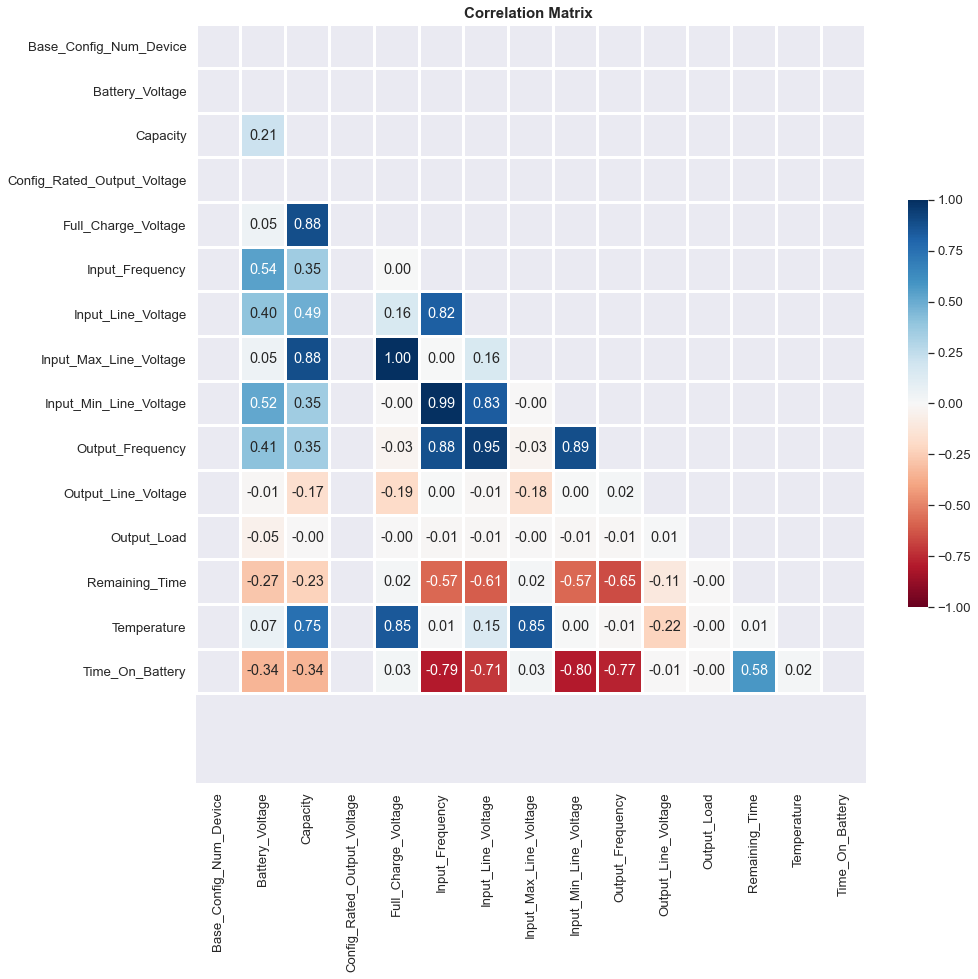

In [110]:
# Correlation Matrix with pearson method

plt.figure(figsize=(15,15))
corr_numerical=data_newer.corr(method='pearson')
mask_numerical = np.triu(np.ones_like(corr_numerical, dtype=np.bool))
sns.heatmap(corr_numerical, annot=True, fmt=".2f", cmap='RdBu', mask= mask_numerical, vmin=-1, vmax=1, center= 0,
          square=True, linewidths=2, cbar_kws={"shrink": .5}).set(ylim=(17, 0))
plt.title("Correlation Matrix ",size=15, weight='bold')